# STAT 504 Fall 2015

Homework #3 <br/>
Amanda Culley

Conduct a data analysis for the above two Data Sets #1 and #2 using all you have learned in the semester to cleanup, build, and  compare/contrast the performance (10-CV with AUC- measure) of various models (including variables/features selections, Null, 1) NB, 2) knn, 3) logistic regression, 4) SVM Polynomial kernel, 5) SVM Gaussian kernel, 6) Tree, 7) Bagging, 8) Random Forest, 9) Noisy Replications Ensembling, 10) plus one feasible model of your choice which was not covered in class). Overlay all model ROC curves in one figure for the same data set, with a legend key. Discuss your modeling process, interesting findings, and conclusions.

Specifics:

Use 10CV mAUC measure to find the optimal model hyper-parameters.
For SVM, do both the polynomial and Gaussian kernel with the optimal model hyper-meters
For Ensembling, do Bagging, Random Forest, and Noisy Replications.
Measure and report the execution time for running each of these 10 models in Python. 

I haven't been able to finish running the code on time, so here are some of the results, with no parameter optimization, and all of the code.  I'll post the rest of the results, and a conclusion section once it's all finished running.

# Strong Data Set

## Data loading/processing

In [3]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

data=pd.read_csv('/home/thyme/StatAnalytics/Strong.csv')
data=data.iloc[:,0:338]

filter = data["FelRecidYr3"] != " "
data = data[filter]

data=data.replace(' ','NaN')
felrec=data['FelRecidYr3'].astype(float)
X=data.drop('FelRecidYr3', axis=1)

/home/thyme/anaconda3/lib/python3.5/site-packages/pandas/core/common.py:449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


## Feature Selection

In [89]:
from sklearn.feature_selection import SelectPercentile, chi2, f_classif, SelectKBest
X=SelectKBest(chi2, k=50).fit_transform(X, felrec)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, felrec, random_state=1234567)

## Naive Bayes

In [119]:
start = time.time()

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_prob_nb = nb.predict_proba(X_test)[:, 1]

nbscores = cross_val_score(nb, X, felrec, cv=10, scoring='roc_auc')
nbscores
nbauc=nbscores.mean()

end = time.time()
nbtime=end-start

## Logistic Regression

In [120]:
start = time.time()
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_prob_log = logreg.predict_proba(X_test)[:, 1]

logscores = cross_val_score(logreg, X, felrec, cv=10, scoring='roc_auc')
logscores
logauc=logscores.mean()
end = time.time()
logtime=end-start

# KNN

### Optimize hyper-parameter

In [98]:
start = time.time()
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 60)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, felrec, cv=10, scoring='roc_auc')
    k_scores.append(scores.mean())

end = time.time()
knn_n_time=end-start

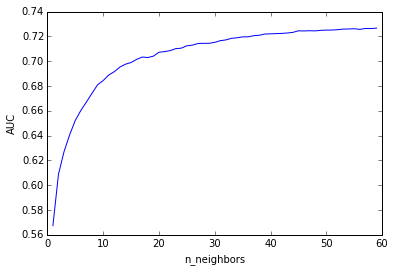

In [99]:
%matplotlib inline
plt.plot(k_range, k_scores)
plt.xlabel('n_neighbors')
plt.ylabel('AUC')

### Run Model

In [121]:
start = time.time()
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
knnscores = cross_val_score(knn, X, felrec, cv=10, scoring='roc_auc')
knnscores
knn_auc=knnscores.mean()
end = time.time()
knn_time=end-start
knn_time=knn_n_time + knn_m_time

## SVC Gaussian Kernel

### Optimize hyper-parameters

In [85]:
start = time.time()
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
from sklearn.cross_validation import StratifiedShuffleSplit
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(felrec, n_iter=5, test_size=0.2, random_state=42)
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
grid = GridSearchCV(SVC(random_state=1), param_grid=param_grid, cv=cv)
grid.fit(X, felrec)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))
end = time.time()
svcg_p_time=end-start

KeyboardInterrupt: 

### Run Model

In [93]:
start = time.time()
clf = SVC(kernel='rbf', random_state=1, probability=True)
clf.fit(X_train,y_train)
y_pred_prob_svcg = clf.predict_proba(X_test)[:, 1]
svcgscores = cross_val_score(clf, X, felrec, cv=10, scoring='roc_auc')
svcgscores
svcg_auc=svcgscores.mean()
end = time.time()
svcg_m_time=end-start
#svcg_time=svcg_p_time + svcg_m_time

## SVC Polynomial Kernel

### Optimize hyper-parameters

In [ ]:
start = time.time()
C_range = np.logspace(-2, 10, 13)
degree_range = np.logspace(-3, 2, 13)
from sklearn.cross_validation import StratifiedShuffleSplit
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(felrec, n_iter=5, test_size=0.2, random_state=42)

from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
grid = GridSearchCV(SVC(kernel='poly', random_state=1),param_grid=param_grid, cv=cv)
grid.fit(X, felrec)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))
end = time.time()
svcp_p_time=end-start

### Run Model

In [96]:
start = time.time()
from sklearn.svm import SVC
clf = SVC( kernel='poly', random_state=1, probability=True)
clf.fit(X_train,y_train)
y_pred_prob_svcp = clf.predict_proba(X_test)[:, 1]
svcgscores = cross_val_score(clf, X, felrec, cv=10, scoring='roc_auc')
svcgscores
svcp_auc=svcgscores.mean()
end = time.time()
svcp_time=end-start
#svcp_time=svcp_p_time + svcp_m_time

## Decision Tree

In [124]:
start = time.time()
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(random_state=1)
treeclf.fit(X_train,y_train)
y_pred_prob_tree = treeclf.predict_proba(X_test)[:, 1]
treescores = cross_val_score(treeclf, X, felrec, cv=10, scoring='roc_auc')
treescores
tree_auc=treescores.mean()
end = time.time()
tree_time=end-start

## Bagged Decision Tree

### Optimize hyper-parameter

In [100]:
start = time.time()
from sklearn.ensemble import BaggingClassifier
potential_n = range(10, 410, 50)
Accuracy_scores = []
for n in potential_n:
    bagclass = BaggingClassifier(treeclf,n_estimators=n, random_state=1)
    scores = cross_val_score(bagclass, X, felrec, cv=10, scoring='roc_auc')
    Accuracy_scores.append(scores.mean())

end = time.time()
bag_p_time=end-start

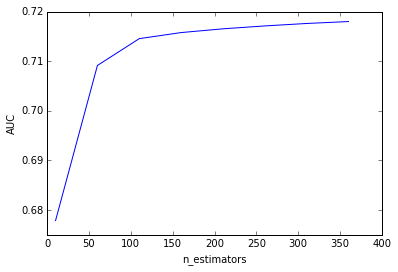

In [101]:
plt.plot(potential_n, Accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('AUC')

### Run Model

In [103]:
start = time.time()
bagging=BaggingClassifier(treeclf,n_estimators=100, random_state=1)
bagging.fit(X_train,y_train)
y_pred_prob_bag = bagging.predict_proba(X_test)[:, 1]
bagscores = cross_val_score(bagging, X, felrec, cv=10, scoring='roc_auc')
bagscores
bag_auc=bagscores.mean()
end = time.time()
bag_time=end-start
bag_time=bag_p_time + bag_m_time

## Random Forest

### Optimize hyper-parameter

In [104]:
start = time.time()
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier()

potential_n = range(10, 410, 50)
Accuracy_scores = []
for n in potential_n:
    rfclass = RandomForestClassifier(n_estimators=n, random_state=1)
    scores = cross_val_score(rfclass, X, felrec, cv=10, scoring='roc_auc')
    Accuracy_scores.append(scores.mean())
end = time.time()
random_p1_time=end-start

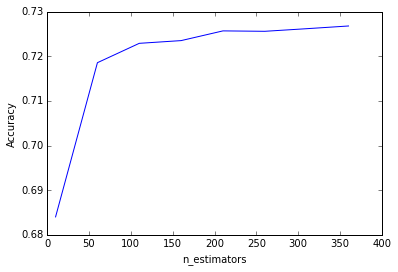

In [105]:
plt.plot(potential_n, Accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

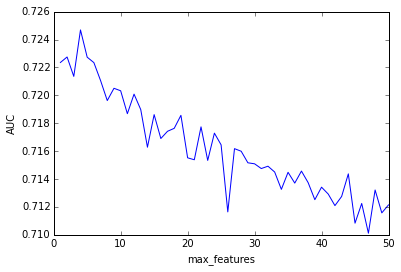

In [115]:
start = time.time()
feature_range = range(1, len(X[1,:])+1)
Accuracy_scores = []

for feature in feature_range:
    rfclass = RandomForestClassifier(n_estimators=80, max_features=feature, random_state=1)
    scores = cross_val_score(rfclass, X, felrec, cv=10, scoring='roc_auc')
    Accuracy_scores.append(scores.mean())
plt.plot(feature_range, Accuracy_scores)
plt.xlabel('max_features')
plt.ylabel('AUC')
end = time.time()
random_p2_time=end-start

### Run Model

In [116]:
start = time.time()
from sklearn.ensemble import RandomForestClassifier
rfclass=RandomForestClassifier(n_estimators=80, max_features=4,random_state=1)
rfclass.fit(X_train,y_train)
y_pred_prob_random = rfclass.predict_proba(X_test)[:, 1]
from sklearn.cross_validation import cross_val_score
rfscores = cross_val_score(rfclass, X, felrec, cv=10, scoring='roc_auc')
rfscores
random_auc=rfscores.mean()
end = time.time()
random_m_time=end-start
random_time=random_p1_time + random_p2_time + random_m_time

# Results

## AUC/Time

In [125]:
print ('Null AUC: ' + str(.5))
print ('Naive Bayes AUC: ' + str(nbauc) + '\n  Time: ' + str(nbtime))
print ('Logistic Regression AUC: ' + str(logauc) + '\n  Time: ' + str(logtime))
print ('K nearest neighbors AUC: ' + str(knn_auc)  + '\n  Time: ' + str(knn_time))
print ('Gaussian SVC AUC: ' + str(svcg_auc) + '\n  Time: ' + str(svcg_m_time))
print ('Polynomial SVC AUC: ' + str(svcp_auc) + '\n  Time: ' + str(svcp_time))
print ('Decision Tree AUC: ' + str(tree_auc)  + '\n  Time: ' + str(tree_time))
print ('Bagged Decision Tree AUC: ' + str(bag_auc) + '\n  Time: ' + str(bag_time))
print ('Random Forest AUC: ' + str(random_auc)  + '\n  Time: ' + str(random_time))

Null AUC: 0.5
Naive Bayes AUC: 0.597059248654
  Time: 0.3619382381439209
Logistic Regression AUC: 0.735355839334
  Time: 5.918241739273071
K nearest neighbors AUC: 0.725146945716
  Time: 3221.489100933075
Gaussian SVC AUC: 0.673294886044
  Time: 1993.4569101333618
Polynomial SVC AUC: 0.662690315328
  Time: 2110.657104730606
Decision Tree AUC: 0.56986260936
  Time: 2.6989004611968994
Bagged Decision Tree AUC: 0.713764103496
  Time: 2258.9797699451447
Random Forest AUC: 0.724693351868
  Time: 3548.1788806915283


## Roc curves

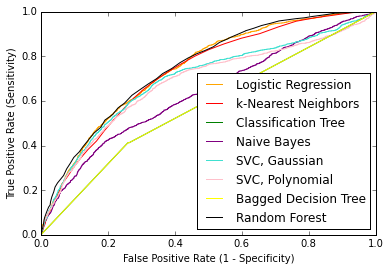

In [126]:
%matplotlib inline
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from sklearn import metrics
fpr_nb, tpr_nb, thresholds = metrics.roc_curve(y_test, y_pred_prob_nb)
plt.plot(fpr_nb, tpr_nb, color='purple')
fpr_log, tpr_log, thresholds = metrics.roc_curve(y_test, y_pred_prob_log)
plt.plot(fpr_log, tpr_log, color='orange')
fpr_knn, tpr_knn, thresholds = metrics.roc_curve(y_test, y_pred_prob_knn)
plt.plot(fpr_knn, tpr_knn, color='red')
fpr_svcg, tpr_svcg, thresholds = metrics.roc_curve(y_test, y_pred_prob_svcg)
plt.plot(fpr_svcg, tpr_svcg, color='turquoise')
fpr_svcp, tpr_svcp, thresholds = metrics.roc_curve(y_test, y_pred_prob_svcp)
plt.plot(fpr_svcp, tpr_svcp, color='pink')
fpr_tree, tpr_tree, thresholds = metrics.roc_curve(y_test, y_pred_prob_tree)
plt.plot(fpr_tree, tpr_tree, color='green')
fpr_bag, tpr_bag, thresholds = metrics.roc_curve(y_test, y_pred_prob_bag)
plt.plot(fpr_tree, tpr_tree, color='yellow')
fpr_bag, tpr_bag, thresholds = metrics.roc_curve(y_test, y_pred_prob_random)
plt.plot(fpr_bag, tpr_bag, color='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
log_line = mlines.Line2D([], [], color='orange', label='Logistic Regression')
knn_line = mlines.Line2D([], [], color='red', label='k-Nearest Neighbors')
tree_line = mlines.Line2D([], [], color='green', label='Classification Tree')
nb_line = mlines.Line2D([], [], color='purple', label='Naive Bayes')
svcg_line = mlines.Line2D([], [], color='turquoise', label='SVC, Gaussian')
svcp_line = mlines.Line2D([], [], color='pink', label='SVC, Polynomial')
bag_line = mlines.Line2D([], [], color='yellow', label='Bagged Decision Tree')
random_line = mlines.Line2D([], [], color='black', label='Random Forest')

plt.legend(handles=[log_line, knn_line, tree_line,nb_line,svcg_line,svcp_line,bag_line,random_line], loc=4)

## Discussion

Logistic Regression, k-Nearest Neighbors, and Random Forest were the three best classification methods.  Logistic Regression was the best, with an AUC of 0.735355839334.  This was particularly nice, since it's run time was very low, only about 6 seconds.

I've had a lot of trouble with the run time of this homework, but this data set was not so much of an issue.  I did not optimize the hyperparameters for the Gaussian or Polynomial kernal SVCs.

# Music Data Set

## Data loading/processing

In [23]:
import pandas as pd
import json
import time
with open('/home/thyme/Stat-504/HW_3/music.json', 'rU') as f:
    data = [json.loads(row) for row in f]
    data2 = pd.DataFrame(data)

music_best_worst = data2[(data2.overall==5) | (data2.overall==1)]


from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(music_best_worst, music_best_worst.overall, random_state=1234567)


#Pull out review text, vectorize
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=1000)
train_dtm = vect.fit_transform(X_train.reviewText)
test_dtm = vect.fit_transform(X_test.reviewText)
dtm=vect.fit_transform(music_best_worst.reviewText)

#roc_auc_score will get confused if y_test contains fives and ones, so you will need to create a new object that contains ones and zeros instead.
import numpy as np
y_test_binary = np.where(y_test==5, 1, 0)
y_train_binary = np.where(y_train==5, 1, 0)
y_binary=np.where(music_best_worst.overall==5,1,0)

## Naive Bayes

In [24]:
start = time.time()

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
y_pred_prob_nb = nb.predict_proba(test_dtm)[:, 1]

nbscores = cross_val_score(nb, dtm, y_binary, cv=10, scoring='roc_auc')
nbscores
nbauc2=nbscores.mean()

end = time.time()
nbtime2=end-start

## Logistic Regression

In [12]:
start = time.time()
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1)
logreg.fit(train_dtm, y_train)
y_pred_prob_log = logreg.predict_proba(test_dtm)[:, 1]

logscores = cross_val_score(logreg, dtm, y_binary, cv=10, scoring='roc_auc')
logscores
logauc2=logscores.mean()
end = time.time()
logtime2=end-start

## KNN

### Optimize Hyperparameter 

In [ ]:
start = time.time()
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 50)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, dtm, y_binary, cv=10, scoring='roc_auc')
    k_scores.append(scores.mean())
print (k_scores)

end = time.time()
knn_n_time=end-start

In [ ]:
%matplotlib inline
plt.plot(k_range, k_scores)
plt.xlabel('n_neighbors')
plt.ylabel('AUC')

### Run Model

In [ ]:
start = time.time()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, random_state=1)
knn.fit(train_dtm, y_train)
y_pred_prob_knn =knn.predict_proba(test_dtm)[:, 1]
knnscores = cross_val_score(knn, dtm, y_binary, cv=10, scoring='roc_auc')
knnscores
knn_auc2=knnscores.mean()
end = time.time()
knn_time2=end-start
#knn_time=knn_n_time + knn_m_time

## Decision Tree

In [17]:
start = time.time()
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(random_state=1)
treeclf.fit(train_dtm, y_train)
y_pred_prob_tree = treeclf.predict_proba(test_dtm)[:, 1]
treescores = cross_val_score(treeclf, dtm, y_binary, cv=10, scoring='roc_auc')
treescores
tree_auc2=treescores.mean()
end = time.time()
tree_time2=end-start

## Bagged Decision Trees

### Hyperparameter optimization

In [ ]:
start = time.time()
from sklearn.ensemble import BaggingClassifier
potential_n = range(10, 410, 50)
Accuracy_scores = []
for n in potential_n:
    bagclass = BaggingClassifier(treeclf,n_estimators=n, random_state=1)
    scores = cross_val_score(bagclass, dtm, y_binary, cv=10, scoring='roc_auc')
    Accuracy_scores.append(scores.mean())
    end = time.time()
bag_p_time=end-start

In [ ]:
import matplotlib.pyplot as plt
plt.plot(potential_n, Accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('AUC')

### Run Model

In [20]:
start = time.time()
from sklearn.ensemble import BaggingClassifier
bagging=BaggingClassifier(treeclf, random_state=1)
bagging.fit(train_dtm, y_train)
y_pred_prob_bag = bagging.predict_proba(test_dtm)[:, 1]
bagscores = cross_val_score(bagging, dtm, y_binary, cv=10, scoring='roc_auc')
bagscores
bag_auc2=bagscores.mean()
end = time.time()
bag_time2=end-start
#bag_time=bag_p_time + bag_m_time

## Random Forest

### Hyperparameter optimization

In [ ]:
start = time.time()
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier()

potential_n = range(10, 410, 50)
Accuracy_scores = []
for n in potential_n:
    rfclass = RandomForestClassifier(n_estimators=n, random_state=1)
    scores = cross_val_score(rfclass, dtm, y_binary, cv=10, scoring='roc_auc')
    Accuracy_scores.append(scores.mean())

    end = time.time()
random_p1_time=end-start

In [ ]:
plt.plot(potential_n, Accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

In [ ]:
start = time.time()
feature_range = range(1, len(dtm.columns)+1)
Accuracy_scores = []

for feature in feature_range:
    rfclass = RandomForestClassifier(n_estimators=?, max_features=feature, random_state=1)
    scores = cross_val_score(rfclass, dtm, y_binary, cv=10, scoring='roc_auc')
    Accuracy_scores.append(scores.mean())


end = time.time()
random_p2_time=end-start

In [ ]:
plt.plot(feature_range, Accuracy_scores)
plt.xlabel('max_features')
plt.ylabel('AUC')

In [12]:
start = time.time()
from sklearn.ensemble import RandomForestClassifier
rfclass=RandomForestClassifier(random_state=1)
rfclass.fit(train_dtm, y_train)
y_pred_prob_random = rfclass.predict_proba(test_dtm)[:, 1]
from sklearn.cross_validation import cross_val_score
rfscores = cross_val_score(rfclass, dtm, y_binary, cv=10, scoring='roc_auc')
rfscores
random_auc2=rfscores.mean()
end = time.time()
random_time2=end-start
#random_time2=random_p1_time + random_p2_time + random_m_time

## SVC Gaussian

### Hyperparameter Optimization

In [ ]:
start = time.time()
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
from sklearn.cross_validation import StratifiedShuffleSplit
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(y_binary, n_iter=5, test_size=0.2, random_state=42)
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(dtm, y_binary)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))
end = time.time()
svcg_p_time=end-start

### Run Model 

In [15]:
from sklearn.svm import SVC
start = time.time()
clf = SVC(kernel='rbf', probability=True)
clf.fit(train_dtm, y_train)
y_pred_prob_svcg = clf.predict_proba(test_dtm)[:, 1]
svcgscores = cross_val_score(clf, dtm, y_binary, cv=10, scoring='roc_auc')
svcgscores
svcg_auc2=svcgscores.mean()
end = time.time()
svcg_time=end-start
#svcg_time2=svcg_p_time + svcg_m_time

## SVC Polynomial

### Hyperparameter Optimization

In [ ]:
start = time.time()
C_range = np.logspace(-2, 10, 13)
degree_range = np.logspace(-3, 2, 13)
from sklearn.cross_validation import StratifiedShuffleSplit
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(y_binary, n_iter=5, test_size=0.2, random_state=42)

from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
grid = GridSearchCV(SVC(kernel='poly'),param_grid=param_grid, cv=cv)
grid.fit(dtm, y_binary)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))
end = time.time()
svcp_p_time=end-start

### Run Model

In [ ]:
start = time.time()
clf = SVC(kernel='poly', probability=True)
clf.fit(train_dtm, y_train)
y_pred_prob_svcp = clf.predict_proba(test_dtm)[:, 1]
svcgscores = cross_val_score(clf, dtm, y_binary, cv=10, scoring='roc_auc')
svcgscores
svcp_auc2=svcgscores.mean()
end = time.time()
svcp_m_time=end-start
#svcp_time2=svcp_p_time + svcp_m_time

# Results

## AUC/Time

In [25]:
print ('Null AUC: ' + str(.5))
print ('Naive Bayes AUC: ' + str(nbauc2) + '\n  Time: ' + str(nbtime2))
print ('Logistic Regression AUC: ' + str(logauc2) + '\n  Time: ' + str(logtime2))
#print ('K nearest neighbors AUC: ' + str(knn_auc2)  + '\n  Time: ' + str(knn_time2))
#print ('Gaussian SVC AUC: ' + str(svcg_auc2) + '\n  Time: ' + str(svcg_time))
#print ('Polynomial SVC AUC: ' + str(svcp_auc2) + '\n  Time: ' + str(svcp_time2))
print ('Decision Tree AUC: ' + str(tree_auc2)  + '\n  Time: ' + str(tree_time2))
print ('Bagged Decision Tree AUC: ' + str(bag_auc2) + '\n  Time: ' + str(bag_time2))
#print ('Random Forest AUC: ' + str(random_auc2)  + '\n  Time: ' + str(random_time2))

Null AUC: 0.5
Naive Bayes AUC: 0.924050584143
  Time: 1.4148693084716797
Logistic Regression AUC: 0.952552833495
  Time: 78.34894919395447
Decision Tree AUC: 0.683768126111
  Time: 1230.929190158844
Bagged Decision Tree AUC: 0.847558458916
  Time: 9343.293667316437


## ROC Curves

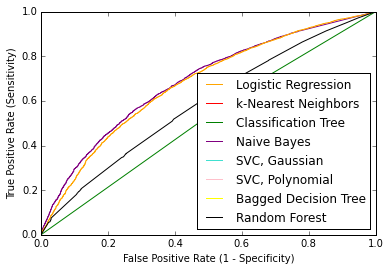

In [22]:
%matplotlib inline
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from sklearn import metrics
fpr_nb, tpr_nb, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob_nb)
plt.plot(fpr_nb, tpr_nb, color='purple')
fpr_log, tpr_log, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob_log)
plt.plot(fpr_log, tpr_log, color='orange')
#fpr_knn, tpr_knn, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob_knn)
#plt.plot(fpr_knn, tpr_knn, color='red')
#fpr_svcg, tpr_svcg, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob_svcg)
#plt.plot(fpr_svcg, tpr_svcg, color='turquoise')
#fpr_svcp, tpr_svcp, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob_svcp)
#plt.plot(fpr_svcp, tpr_svcp, color='pink')
fpr_tree, tpr_tree, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob_tree)
plt.plot(fpr_tree, tpr_tree, color='green')
#fpr_random, tpr_random, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob_random)
#plt.plot(fpr_random, tpr_random, color='yellow')
fpr_bag, tpr_bag, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob_bag)
plt.plot(fpr_bag, tpr_bag, color='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
log_line = mlines.Line2D([], [], color='orange', label='Logistic Regression')
knn_line = mlines.Line2D([], [], color='red', label='k-Nearest Neighbors')
tree_line = mlines.Line2D([], [], color='green', label='Classification Tree')
nb_line = mlines.Line2D([], [], color='purple', label='Naive Bayes')
svcg_line = mlines.Line2D([], [], color='turquoise', label='SVC, Gaussian')
svcp_line = mlines.Line2D([], [], color='pink', label='SVC, Polynomial')
bag_line = mlines.Line2D([], [], color='yellow', label='Bagged Decision Tree')
random_line = mlines.Line2D([], [], color='black', label='Random Forest')

plt.legend(handles=[log_line, knn_line, tree_line,nb_line,svcg_line,svcp_line,bag_line,random_line], loc=4)

## Discussion

I had so much trouble with this data set.  I unfortunately used the same names for the variables in both data sets the first time I ran the code, and I ran the music data set first.  So, when I ran the Strong data set, it overwrote all my results.  So, one important, if slightly obvious, thing I learned from this homework assignment is to use unique variable names.

I didn't optimize any of the hyperparameters for this data set for time reasons.  Also, the Polynomial SVC took 2 days to run, never finished, and then when I stopped it, I lost all of the rest of the results.  So now I'm pretty much giving up and only turning in the results for a few tests.

The tests I was able to run were Naive Bayes, Logistic Regression, Decision Tree Classification, and Bagged Decision Tree.  Amongst those, logistic regression was the best, shortly followed by Naive Bayes.  I'm a little concerned about the values I got for the AUC for Naive Bayes and Logistic Regression, because just looking at the area under the ROC curve, it does not look like the area should be anywhere close to 0.924050584143 or 0.952552833495